# Total challenge

## Presentation of the challenge

### Foreword

This challenge is based on predicting the quantity to supply to convinience stores located on the highway. Indeed, the supply of product is quite expensive on the highways in France. Hence with this prediction, gas stations can be supplied with the right amount of products. This will avoid a waste of money and fresh products.  
All the details can be found here (French): https://datascience.total.com/fr/challenge/9/details

### Purpose of the challenge

The purpose of this challenge is to predict the quantity sold of each product in two specific gas stations (located on the highway around Rouen) . We are going to train our model(s) with the train dataset that was given to us. 

### Format of the answer

The answer should be in a csv file, with semicolon as separators.  
For each product from the "test.csv" file, we should return the id and the predicted quantity to supply. It should look like the table down below :

 id | quantite_vendue 
 --- | --- 
 c9976bb01629 |	0,1234
f731b8b590ff |	0
add0dce853b5 |	1,2345

###  <a name="eval_ans"></a> Evaluation of the answer

The metric used for to evaluate our answer is the RMSE :  
$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2}$  
Where $y_i$ is the quantity really sold, and $\hat{y_i}$ is our prediction

## Begining of the project

This project is available on : https://datascience.total.com/fr/challenge/9/details

### Ressources

There are 3 files available on the website :
 - argedis.pdf : File giving some info about the client and how its products are categorised.
 - DicDataIMTARGEDIS.xlsx : Description of the variables
 - test.csv : The data set used to evaluate our model(s)
 - train.csv : The data set used to train our model(s)  
We might use some open source data, related to the subject. They will be listed down below.

### Constraints

- We can't communicate with the client. We only have the ressources available on the website, and the open source data. The client can't precise what he wants.  
- We are automatically evaluated. We don't have any feedbacks on our models

### Hypothesis

The given data are correct.

### Objectives

Create a model that will give us the minimal RMSE by product. Being able to explain why we chose a specific model.

### Success

Our success will be measured with the RMSE metric as explained on [Evaluation of the answer](#eval_ans)

## Planning of the project
We're going to work on Python 3 with the following libraries : 
* Pandas, numpy for data analysis
* Matplotlib/ seaborn for data vizualisation
* Scikit learn for the models
* Jupyter Notebook to developp our python script

First we're gonna clean the data. Check the missing values, replace according to some functions. Drop columns that have too many missing values

## Overlook of the data
We're gonna see in this party what are the data, and analyse them

### Import libraries and set options

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from datetime import datetime, date

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 40

### Reading the data

In [6]:
train = pd.read_csv("train.csv", sep= ";")

In [7]:
train.head(5)

id   implant        date  \
0  39fc404102d5  NF059473  2016-01-01   
1  aa697ce32b43  NF059473  2016-01-01   
2  291a469e1b50  NF059473  2016-01-01   
3  2dbc07dbc8f0  NF059473  2016-01-01   
4  e664714361d6  NF059473  2016-01-01   

                                  article_nom  id_categorie_6  \
0  Cookie Cara Noix Pecan 70G Michel Augustin         1001672   
1         Cookie Choc Blc 70G Michel Augustin         1001672   
2        Cookie Choc Nois 70G Michel Augustin         1001672   
3            Cookie Choco 70G Michel Augustin         1001672   
4          Croissant 60G Cuit/Place Neuhauser         1001674   

  qte_article_vendue  id_categorie_5  id_categorie_4           cat6_nom  \
0               0,56         1001664         1001639  Patiss PréEmballé   
1               1,11         1001664         1001639  Patiss PréEmballé   
2               0,56         1001664         1001639  Patiss PréEmballé   
3               0,56         1001664         1001639  Patiss PréEmballé   
4               4,08         1001665         1001639   Vienn cuit/place   

       cat5_nom             cat4_nom t_9h_rouen n_9h_rouen rr3_9h_rouen  \
0    Patisserie  Boulan Vienn Patiss     278,25      100,0          0,2   
1    Patisserie  Boulan Vienn Patiss     278,25      100,0          0,2   
2    Patisserie  Boulan Vienn Patiss     278,25      100,0          0,2   
3    Patisserie  Boulan Vienn Patiss     278,25      100,0          0,2   
4  Viennoiserie  Boulan Vienn Patiss     278,25      100,0          0,2   

  ff_9h_rouen t_15h_rouen n_15h_rouen rr3_15h_rouen ff_15h_rouen t_9h_paris  \
0         4,0      280,05       100,0           0,0          7,6     278,05   
1         4,0      280,05       100,0           0,0          7,6     278,05   
2         4,0      280,05       100,0           0,0          7,6     278,05   
3         4,0      280,05       100,0           0,0          7,6     278,05   
4         4,0      280,05       100,0           0,0          7,6     278,05   

  n_9h_paris rr3_9h_paris ff_9h_paris t_15h_paris n_15h_paris rr3_15h_paris  \
0      101,0          0,0         2,5      280,55       100,0           0,0   
1      101,0          0,0         2,5      280,55       100,0           0,0   
2      101,0          0,0         2,5      280,55       100,0           0,0   
3      101,0          0,0         2,5      280,55       100,0           0,0   
4      101,0          0,0         2,5      280,55       100,0           0,0   

  ff_15h_paris  aller_zone_1  aller_zone_2  aller_zone_3  aller_zone_4  \
0          3,2             0             0             0             0   
1          3,2             0             0             0             0   
2          3,2             0             0             0             0   
3          3,2             0             0             0             0   
4          3,2             0             0             0             0   

   aller_zone_5  aller_zone_6  retour_zone_1  retour_zone_2  retour_zone_3  \
0             0             0              0              0              0   
1             0             0              0              0              0   
2             0             0              0              0              0   
3             0             0              0              0              0   
4             0             0              0              0              0   

   retour_zone_4  retour_zone_5  retour_zone_6  
0              0              0              0  
1              0              0              0  
2              0              0              0  
3              0              0              0  
4              0              0              0

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198288 entries, 0 to 198287
Data columns (total 39 columns):
id                    198288 non-null object
implant               198288 non-null object
date                  198288 non-null object
article_nom           198288 non-null object
id_categorie_6        198288 non-null int64
qte_article_vendue    198288 non-null object
id_categorie_5        198288 non-null int64
id_categorie_4        198288 non-null int64
cat6_nom              198288 non-null object
cat5_nom              198288 non-null object
cat4_nom              198288 non-null object
t_9h_rouen            198288 non-null object
n_9h_rouen            198288 non-null object
rr3_9h_rouen          198288 non-null object
ff_9h_rouen           198288 non-null object
t_15h_rouen           198288 non-null object
n_15h_rouen           198288 non-null object
rr3_15h_rouen         198288 non-null object
ff_15h_rouen          198288 non-null object
t_9h_paris            198288 non-null

Recap : 
- 198288 entries 
- 486 days
- 2 oil stations

In [9]:
print("So that means")
print(198288/486,"entries per day")
print(198288/(486*2),"entries per day per station")
print('for each product, there is',486*2,'different ids in category 6 (one per day per station)')

So that means
408.0 entries per day
204.0 entries per day per station
for each product, there is 972 different ids in category 6 (one per day per station)


## First look of the data

### The date column is a string, to work on it, we have to change its format 

In [10]:
# 'date' class is a string, let's transform it into a datetime.date
print(type(train['date'][0]))
train['date']=pd.to_datetime(train['date'])
train['date']=train['date'].apply(lambda x:x.date())
print(type(train['date'][0]))
print(train['date'][0])
print(train['date'][0].month)

<class 'str'>
<class 'datetime.date'>
2016-01-01
1


### Temperature

In which unit is expressed the temperature ?

In [11]:
# The temperature field is a string with a coma as separator
# We need to convert it from string to float

print(type(train["t_9h_paris"][0]))
train["t_9h_paris"] = train["t_9h_paris"].apply(lambda var: var.replace(",","."))
train["t_9h_paris"] = pd.to_numeric(train["t_9h_paris"])
print(type(train["t_9h_paris"][0]))

train["t_15h_paris"] = train["t_15h_paris"].apply(lambda var: var.replace(",","."))
train["t_15h_paris"] = pd.to_numeric(train["t_15h_paris"])

train["t_9h_rouen"] = train["t_9h_rouen"].apply(lambda var: var.replace(",","."))
train["t_9h_rouen"] = pd.to_numeric(train["t_9h_rouen"])

train["t_15h_rouen"] = train["t_15h_rouen"].apply(lambda var: var.replace(",","."))
train["t_15h_rouen"] = pd.to_numeric(train["t_15h_rouen"])

<class 'str'>
<class 'numpy.float64'>


what is the unit of the temperature field ?

In [12]:
# x axis
allDates=np.arange('2016-01', '2017-05', dtype= 'datetime64[D]')

In [13]:
# Let's represent the temperature for every day we have
t9R=[0]*486
for i in range(len(allDates)):
    t9R[i]=train.groupby('date')["t_9h_rouen"].mean()[i]
    
pd.DataFrame(t9R,index=allDates).iplot(kind='bar',title='t_9h_rouen for every day',xTitle='Months', yTitle='Temperature')

In [14]:
# The temperature is in Kelvin, let's display it in Celsius to have a better look at it.
for i in range(len(allDates)):
    t9R[i]-=273.15
    
pd.DataFrame(t9R,index=allDates).iplot(kind='bar',title='(t_9h_rouen - 273.15) for every day',xTitle='Days', yTitle='Temperature')

So, the temperature is expressed in Kelvin. We can have it in Celsius by substracting 273.15 to its values.

### Nebulosity

Here we're trying to see what are the values of the "nebulosité" serie.

In [15]:
# The nebulosity is expressed as a string with a coma 
# We need to convert it from string to float

print(type(train["n_9h_paris"][0]))
train["n_9h_paris"] = train["n_9h_paris"].apply(lambda var: var.replace(",","."))
train["n_9h_paris"] = pd.to_numeric(train["n_9h_paris"])
print(type(train["n_9h_paris"][0]))

train["n_15h_paris"] = train["n_15h_paris"].apply(lambda var: var.replace(",","."))
train["n_15h_paris"] = pd.to_numeric(train["n_15h_paris"])

train["n_9h_rouen"] = train["n_9h_rouen"].apply(lambda var: var.replace(",","."))
train["n_9h_rouen"] = pd.to_numeric(train["n_9h_rouen"])

train["n_15h_rouen"] = train["n_15h_rouen"].apply(lambda var: var.replace(",","."))
train["n_15h_rouen"] = pd.to_numeric(train["n_15h_rouen"])

<class 'str'>
<class 'numpy.float64'>


#### Print the n_9h_rouen distribution

In [16]:
daysOfLight=train["n_9h_rouen"].value_counts()/408
print(daysOfLight)

100.00    205.0
90.00     110.0
75.00      47.0
101.00     29.0
25.00      20.0
0.00       18.0
60.00      16.0
40.00      14.0
50.00      12.0
10.00      10.0
76.55       1.0
23.15       1.0
60.62       1.0
92.74       1.0
79.62       1.0
Name: n_9h_rouen, dtype: float64


In [17]:
print("Nebulosity at 9am in Rouen")
daysOfLight.iplot(kind='bar',title='Days of Light per nebulosity value in n_9h_rouen (Total is 486 days)',xTitle='Nebulosité value', yTitle='Number of occurences')

Nebulosity at 9am in Rouen


In [18]:
print([train["n_9h_rouen"].max(),train["n_15h_rouen"].max(),train["n_9h_paris"].max(),train["n_15h_paris"].max()])

[101.0, 101.0, 101.0, 101.0]


We can see that the "nébulosité" field has a maximum value of 101. However, according to its general definition, it's supposed to be a percentage of lighting (even an 8th). To what corresponds this value?

How many of these values are in the dataset ?

In [19]:
print(train[train["n_9h_rouen"] == train["n_9h_rouen"].max()]["n_9h_rouen"].value_counts())
print(train[train["n_15h_rouen"] == train["n_15h_rouen"].max()]["n_15h_rouen"].value_counts())
print(train[train["n_9h_paris"] == train["n_9h_paris"].max()]["n_9h_paris"].value_counts())
print(train[train["n_15h_paris"] == train["n_15h_paris"].max()]["n_15h_paris"].value_counts())

101.0    11832
Name: n_9h_rouen, dtype: int64
101.0    5712
Name: n_15h_rouen, dtype: int64
101.0    4080
Name: n_9h_paris, dtype: int64
101.0    1224
Name: n_15h_paris, dtype: int64


In [20]:
# there are 408 entries every day
print('In Rouen at 9am, there are',int(11832/408),'days where nebulosity is equal to 101')
print('In Rouen at 3pm, there are',int(5712/408),'days where nebulosity is equal to 101')
print("")
print('In Paris at 9am, there are',int(4080/408),'days where nebulosity is equal to 101')
print('In Paris at 3pm, there are',int(1224/408),'days where nebulosity is equal to 101')

In Rouen at 9am, there are 29 days where nebulosity is equal to 101
In Rouen at 3pm, there are 14 days where nebulosity is equal to 101

In Paris at 9am, there are 10 days where nebulosity is equal to 101
In Paris at 3pm, there are 3 days where nebulosity is equal to 101


#### Let's try to see at what time of the year these occurences happened

In [21]:
# this variable contains all of the days when nebulosity was equal to 101 at 9am in Rouen.
datesN101_9_R=train[train["n_9h_rouen"] == train["n_9h_rouen"].max()]['date'].unique()

n101=[0]*486
for i in range(len(datesN101_9_R)):
    index1=np.where(allDates == datesN101_9_R[i])[0][0]
    n101[index1]=101

pd.DataFrame(n101,index=allDates).iplot(title='Days when n_9h_rouen = 101',xTitle='Days', yTitle='Nebulosité value')

In [22]:
# this variable contains all of the days when nebulosity was equal to 101 at 9am in Rouen.
datesN101_9_R=train[train["n_15h_rouen"] == train["n_15h_rouen"].max()]['date'].unique()

n101=[0]*486
for i in range(len(datesN101_9_R)):
    index2=np.where(allDates == datesN101_9_R[i])[0][0]
    n101[index2]=101

pd.DataFrame(n101,index=allDates).iplot(title='Days when n_15h_rouen = 101',xTitle='Days', yTitle='Nebulosité value')

In [23]:
# this variable contains all of the days when nebulosity was equal to 101 at 9am in Rouen.
datesN101_9_R=train[train["n_9h_paris"] == train["n_9h_paris"].max()]['date'].unique()

n101=[0]*486
for i in range(len(datesN101_9_R)):
    index3=np.where(allDates == datesN101_9_R[i])[0][0]
    n101[index3]=101

pd.DataFrame(n101,index=allDates).iplot(title='Days when n_9h_paris = 101',xTitle='Days', yTitle='Nebulosité value')


In [24]:
# this variable contains all of the days when nebulosity was equal to 101 at 9am in Rouen.
datesN101_9_R=train[train["n_15h_paris"] == train["n_15h_paris"].max()]['date'].unique()

n101=[0]*486
for i in range(len(datesN101_9_R)):
    index4=np.where(allDates == datesN101_9_R[i])[0][0]
    n101[index4]=101

pd.DataFrame(n101,index=allDates).iplot(title='Days when n_15h_paris = 101',xTitle='Days', yTitle='Nebulosité value')

#### From the weather report, we learn that there were a lot of fog in Rouen and Paris the days where nebulosity = 101, especially in the mornings and at the end of December 2016 / beginning of January 2017.
We can conclude that (nebulosity == 101) => fog
> https://www.historique-meteo.net/france/normandie/rouen/2017/01/

![](nebulositeRouen.png)

### Wind

In [25]:
# The wind is expressed as a string with a coma 
# We need to convert it from string to float

print(type(train["ff_9h_paris"][0]))
train["ff_9h_paris"] = train["ff_9h_paris"].apply(lambda var: var.replace(",","."))
train["ff_9h_paris"] = pd.to_numeric(train["ff_9h_paris"])
print(type(train["ff_9h_paris"][0]))

train["ff_15h_paris"] = train["ff_15h_paris"].apply(lambda var: var.replace(",","."))
train["ff_15h_paris"] = pd.to_numeric(train["ff_15h_paris"])

train["ff_9h_rouen"] = train["ff_9h_rouen"].apply(lambda var: var.replace(",","."))
train["ff_9h_rouen"] = pd.to_numeric(train["ff_9h_rouen"])

train["ff_15h_rouen"] = train["ff_15h_rouen"].apply(lambda var: var.replace(",","."))
train["ff_15h_rouen"] = pd.to_numeric(train["ff_15h_rouen"])

<class 'str'>
<class 'numpy.float64'>


#### ff_9h_rouen distribution

In [26]:
print("number of different values =",train["ff_9h_rouen"].nunique()) 
print("")
print("max is", train["ff_9h_rouen"].max(),"it was reached at the date",train[train["ff_9h_rouen"] == train["ff_9h_rouen"].max()]['date'].unique()[0])
print("min is", train["ff_9h_rouen"].min())

number of different values = 91

max is 10.5 it was reached at the date 2016-11-20
min is 0.0


#### According to www.infoclimat.fr the winds in rouen at 9am that day were very strong (gusts around 90km/h that is Beaufort number 10) => The data should be following the Beaufort scale

In [27]:
print("how many times each value is present ?")
windperday=train["ff_9h_rouen"].value_counts()/408
print(windperday)
windperdayInt=train["ff_9h_rouen"].apply(lambda x:int(x)).value_counts()/408

how many times each value is present ?
3.900     17.0
3.700     15.0
4.000     14.0
2.900     11.0
2.400     11.0
4.200     11.0
3.300     11.0
5.400     11.0
3.600     11.0
2.500     10.0
5.700     10.0
3.000     10.0
2.800     10.0
2.600     10.0
3.400     10.0
2.700      9.0
4.800      9.0
3.500      9.0
2.200      9.0
3.100      9.0
          ... 
7.100      2.0
3.863      1.0
7.900      1.0
7.200      1.0
9.200      1.0
2.725      1.0
9.100      1.0
6.705      1.0
2.747      1.0
9.400      1.0
8.100      1.0
10.100     1.0
10.500     1.0
10.400     1.0
9.700      1.0
8.200      1.0
3.498      1.0
8.300      1.0
8.800      1.0
6.900      1.0
Name: ff_9h_rouen, Length: 91, dtype: float64


In [28]:
print("What does it looks like on a bar plot ?")

windperdayInt.iplot(kind='bar',title='Number of occurences of a certain wind value. Source is ff_9h_rouen (Total is 486 days)',xTitle='Wind value', yTitle='Number of occurences')

What does it looks like on a bar plot ?


In [29]:
# Let's print it for every day of the year

ff9R=[0]*486
for i in range(len(allDates)):
    ff9R[i]=train.groupby('date')["ff_9h_rouen"].mean()[i]
    
pd.DataFrame(ff9R,index=allDates).iplot(kind='bar',title='ff_9h_rouen for every day',xTitle='Days', yTitle='Force of the wind')

ff_hour_city is following the Beaufort Scale

The data corresponds with what we can see on :
https://www.infoclimat.fr/observations-meteo/archives/27/janvier/2016/rouen-boos/07037.html

### Rain falls

#### rr3_9h_rouen distribution

In [30]:
# The rainfalls is expressed as a string with a coma 
# We need to convert it from string to float

print(type(train["rr3_9h_paris"][0]))
train["rr3_9h_paris"] = train["rr3_9h_paris"].apply(lambda var: var.replace(",","."))
train["rr3_9h_paris"] = pd.to_numeric(train["rr3_9h_paris"])
print(type(train["rr3_9h_paris"][0]))

train["rr3_15h_paris"] = train["rr3_15h_paris"].apply(lambda var: var.replace(",","."))
train["rr3_15h_paris"] = pd.to_numeric(train["rr3_15h_paris"])

train["rr3_9h_rouen"] = train["rr3_9h_rouen"].apply(lambda var: var.replace(",","."))
train["rr3_9h_rouen"] = pd.to_numeric(train["rr3_9h_rouen"])

train["rr3_15h_rouen"] = train["rr3_15h_rouen"].apply(lambda var: var.replace(",","."))
train["rr3_15h_rouen"] = pd.to_numeric(train["rr3_15h_rouen"])

<class 'str'>
<class 'numpy.float64'>


In [31]:
print("number of different values =",train["rr3_9h_rouen"].nunique()) 
print("")
print("max is", train["rr3_9h_rouen"].max(),"it was reached at the date",train[train["rr3_9h_rouen"] == train["rr3_9h_rouen"].max()]['date'].unique()[0])
print("min is", train["rr3_9h_rouen"].min())

number of different values = 30

max is 11.9 it was reached at the date 2017-02-04
min is -0.1


#### According to www.infoclimat.fr the rain falls in Rouen that entire day were around 17.8 mm so 11.9mm at 9am seems ok

In [32]:
print("how many times each value is present ?")
rainperday=train["rr3_9h_rouen"].value_counts()/408
print(rainperday)
rainperdayInt=train["rr3_9h_rouen"].apply(lambda x:int(x)).value_counts()/408

how many times each value is present ?
 0.000     338.0
 0.200      43.0
-0.100      42.0
 0.600      13.0
 0.400      10.0
 1.800       4.0
 1.000       3.0
 0.800       3.0
 3.000       3.0
 1.200       3.0
 1.600       3.0
 2.400       2.0
 2.800       2.0
 11.900      1.0
 3.600       1.0
 2.200       1.0
 0.090       1.0
 2.000       1.0
 4.000       1.0
 0.143       1.0
 0.409       1.0
 2.600       1.0
 8.700       1.0
 7.500       1.0
 9.900       1.0
 5.100       1.0
 0.007       1.0
 3.200       1.0
 3.800       1.0
 0.091       1.0
Name: rr3_9h_rouen, dtype: float64


What does it looks like on a bar plot ?
AxesSubplot(0.125,0.125;0.775x0.755)


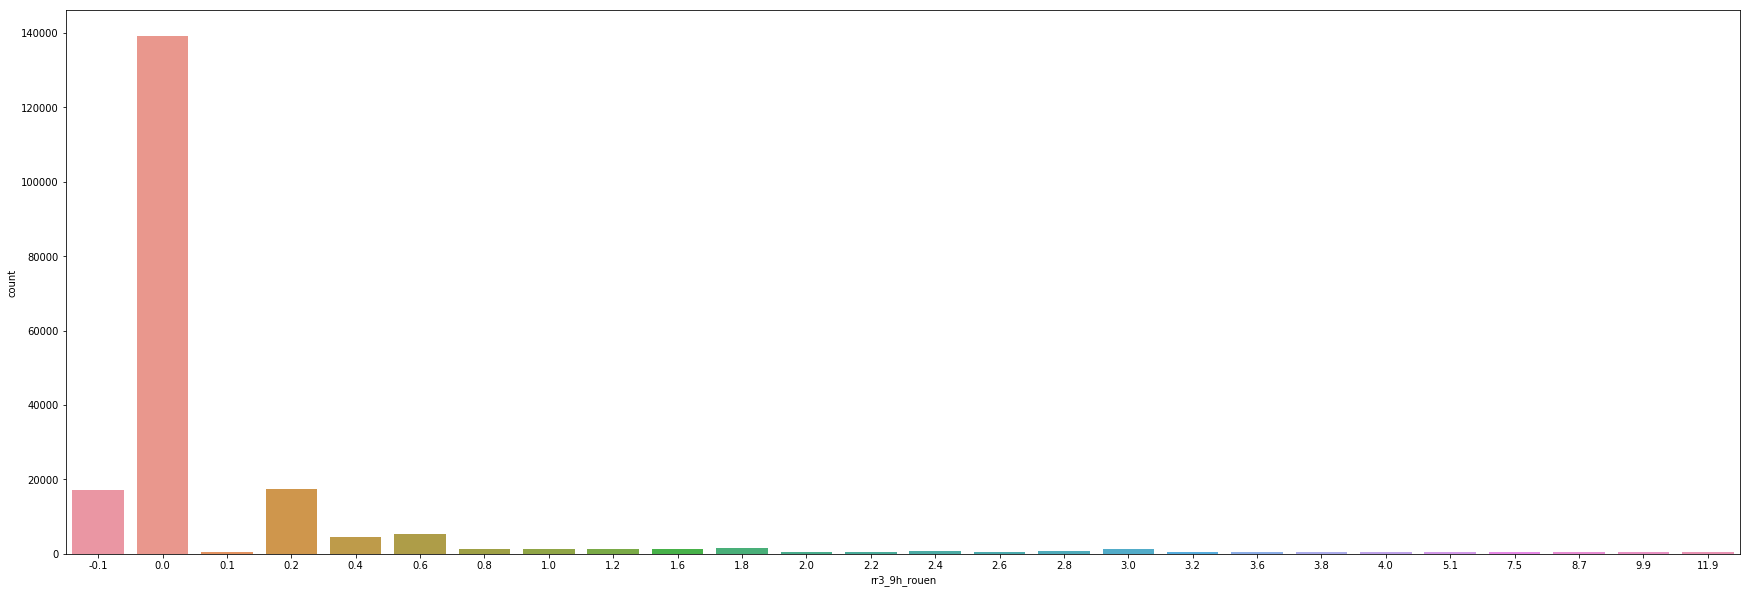

In [33]:
print("What does it looks like on a bar plot ?")

fig = plt.figure(figsize=(30,10))
print(sn.countplot(train["rr3_9h_rouen"].apply(lambda x:int(x*10)/10)))

#### We can see that the rainfalls can be equal to -0.1 for a lot of values. It is not physically possible so this value must have a meaning that we will try to explain.

What are the days when the precipitation value is -0.1 ?

In [34]:
# Print the rainfalls in Rouen at 9am for every day of the year

rr3_9R=[0]*486
for i in range(len(allDates)):
    rr3_9R[i]=train.groupby('date')["rr3_9h_rouen"].mean()[i]
    
pd.DataFrame(rr3_9R,index=allDates).iplot(kind='bar',title='rr3_9h_rouen for every day',xTitle='Days', yTitle='Rain Falls')



In [35]:
# Print the rainfalls in Rouen at 3pm for every day of the year

rr3_15R=[0]*486
for i in range(len(allDates)):
    rr3_15R[i]=train.groupby('date')["rr3_15h_rouen"].mean()[i]
    
pd.DataFrame(rr3_15R,index=allDates).iplot(kind='bar',title='rr3_15h_rouen for every day',xTitle='Days', yTitle='Rain Falls')


### The data is fits perfectly with https://www.infoclimat.fr/climatologie/annee/2016/rouen-boos/valeurs/07037.html

values in the csv file | values from https://www.infoclimat.fr/observations-meteo/archives/9/avril/2016/rouen-boos/07037.html
- | - 
![alt](rainfallday2.png) | ![alt](rainfallday2table.png)
![alt](rainfallday1.png) | ![alt](rainfallday1table.png)

For every value of rr3_15h_rouen and rr3_9h_rouen, this value is the sum of the values of the three last hours from infoclimat.fr 
> - Example : Apr 9, 2016 has a value of 5.5 in rr3_15h_rouen. 
- This value can be found by adding 2.5+1.8+1.2 from the website. 
- These hours are selected because according to the website, the line '17h' is transmitted at 3pm, that is 15h.

According to https://www.infoclimat.fr/climatologie/annee/2016/rouen-boos/valeurs/07037.html

When rr3_15h_rouen = -0.1 : the website gives '0 mm/1h'

Some of these days are the days when it snowed :

>Days of snow (9am):
- 15/01/2016
- 17/01/2016
- 18/02/2016
- 13/01/2017
- 11/02/2017


### Id of the two gas stations

In [36]:
train["implant"].value_counts()

NF078544    99144
NF059473    99144
Name: implant, dtype: int64

We can see that : 
- NF078544 
> Beuzeville' gas station <br>
https://www.google.fr/maps/place/Total/@49.3093522,0.3356408,11.92z/data=!4m5!3m4!1s0x47e1caf7b2d7546d:0xa7a5f053e610517e!8m2!3d49.3248478!4d0.328814
- NF059473 
> Bosgouet's gas station <br> 
https://www.google.fr/maps/search/13+-+AIRE+DE+BOSGOUET+SUD+27310+BOURG+ACHARd/@49.3711274,0.7536505,10.69z

### Id Categories

#### Id categorie_6 : meaning

In [37]:
train["id_categorie_6"].value_counts().index

Int64Index([1001770, 1001762, 1001767, 1001781, 1001785, 1001773, 1001790,
            1001771, 1001672, 1001760, 1001794, 1001791, 1001793, 1001786,
            1001768, 1001761, 1001766, 1001669, 1001764, 1001676, 1001674,
            1001763],
           dtype='int64')

In [38]:
train[train["id_categorie_6"] == 1001770]["cat6_nom"].value_counts()

Yaourts à Boire    32076
Name: cat6_nom, dtype: int64

In [39]:
train.groupby('id_categorie_6')['cat6_nom'].value_counts()

id_categorie_6  cat6_nom               
1001669         Boul PréEmballée            2916
1001672         Patiss PréEmballé          11664
1001674         Vienn cuit/place            1944
1001676         Vienn PréEmballée           1944
1001760         Jambon                      9720
1001761         Paté - Terrine              3888
1001762         Saussisson                 19440
1001763         Autre Charcuterie            972
1001764         Beurre Margarine            1944
1001766         Desserts Crémerie           2916
1001767         Fromages                   15552
1001768         Lait Frais                  3888
1001770         Yaourts à Boire            32076
1001771         Yaourt From Blanc          11664
1001773         Fruits Barquette           13608
1001781         Plat Prép, Traiteur 10%    14580
1001785         Sand Ind Gd Bag            14580
1001786         Sand Ind Min Bag            3888
1001790         Sand Ind Tri Class         13608
1001791         Sand Ind Tri 

#### id_categorie_5 : meaning

In [40]:
train.groupby('id_categorie_5')['cat5_nom'].value_counts()

id_categorie_5  cat5_nom             
1001663         Boulangerie               2916
1001664         Patisserie               11664
1001665         Viennoiserie              3888
1001705         Jambon                    9720
1001706         Paté - Terrine            3888
1001707         Saucisson                19440
1001708         Autre Charcuterie          972
1001709         Beurre et margarine       1944
1001711         Desserts Crémerie         2916
1001712         Fromages                 15552
1001713         Lait Frais                3888
1001715         Yaourts à boire          32076
1001716         Yaourt Fromage Blanc     11664
1001718         Fruits Barquette         13608
1001726         Plats Prép Traiteur      14580
1001730         Sandw Ind Gd Baguette    14580
1001731         Sand Ind Min Baguette     3888
1001735         Triangle Classi/Simpl    13608
1001736         Triangle Gourm/Extra      5832
1001738         Sand Triangles XXL        4860
1001739         Autr S

#### id_categorie_4 

In [41]:
train.groupby('id_categorie_4')['cat4_nom'].value_counts()

id_categorie_4  cat4_nom           
1001639         Boulan Vienn Patiss    18468
1001683         Charcuterie            34020
1001684         Crémerie               68040
1001685         Fruits et Légumes      13608
1001687         Traiteur               14580
1001688         Baguettes              18468
1001691         Triangles              24300
1001692         Autr Sandwich Indus     6804
Name: cat4_nom, dtype: int64

Based on these observations :
- We can see that to each category id, there's a unique name. This mean that the two columns have the same values.
- Category 4 is more coarse-grained, and Category 6 is more fine-grained

Organisation of the categories :  
- Category 4 
  - Category 5 
    - Category 6
      - Item to sell

### Zone Bison Futé (traffic circulation in France) 

All the info about how France is splited into 6 pieces is available on :  
> https://www.bison-fute.gouv.fr/IMG/pdf/17237_Calendrier_Bison-Fute_2018_Web.pdf

 ![](bisonfute.png)

## Description of the data

In [42]:
train.head(5)

id   implant        date  \
0  39fc404102d5  NF059473  2016-01-01   
1  aa697ce32b43  NF059473  2016-01-01   
2  291a469e1b50  NF059473  2016-01-01   
3  2dbc07dbc8f0  NF059473  2016-01-01   
4  e664714361d6  NF059473  2016-01-01   

                                  article_nom  id_categorie_6  \
0  Cookie Cara Noix Pecan 70G Michel Augustin         1001672   
1         Cookie Choc Blc 70G Michel Augustin         1001672   
2        Cookie Choc Nois 70G Michel Augustin         1001672   
3            Cookie Choco 70G Michel Augustin         1001672   
4          Croissant 60G Cuit/Place Neuhauser         1001674   

  qte_article_vendue  id_categorie_5  id_categorie_4           cat6_nom  \
0               0,56         1001664         1001639  Patiss PréEmballé   
1               1,11         1001664         1001639  Patiss PréEmballé   
2               0,56         1001664         1001639  Patiss PréEmballé   
3               0,56         1001664         1001639  Patiss PréEmballé   
4               4,08         1001665         1001639   Vienn cuit/place   

       cat5_nom             cat4_nom  t_9h_rouen  n_9h_rouen  rr3_9h_rouen  \
0    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
1    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
2    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
3    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
4  Viennoiserie  Boulan Vienn Patiss      278.25       100.0           0.2   

   ff_9h_rouen  t_15h_rouen  n_15h_rouen  rr3_15h_rouen  ff_15h_rouen  \
0          4.0       280.05        100.0            0.0           7.6   
1          4.0       280.05        100.0            0.0           7.6   
2          4.0       280.05        100.0            0.0           7.6   
3          4.0       280.05        100.0            0.0           7.6   
4          4.0       280.05        100.0            0.0           7.6   

   t_9h_paris  n_9h_paris  rr3_9h_paris  ff_9h_paris  t_15h_paris  \
0      278.05       101.0           0.0          2.5       280.55   
1      278.05       101.0           0.0          2.5       280.55   
2      278.05       101.0           0.0          2.5       280.55   
3      278.05       101.0           0.0          2.5       280.55   
4      278.05       101.0           0.0          2.5       280.55   

   n_15h_paris  rr3_15h_paris  ff_15h_paris  aller_zone_1  aller_zone_2  \
0        100.0            0.0           3.2             0             0   
1        100.0            0.0           3.2             0             0   
2        100.0            0.0           3.2             0             0   
3        100.0            0.0           3.2             0             0   
4        100.0            0.0           3.2             0             0   

   aller_zone_3  aller_zone_4  aller_zone_5  aller_zone_6  retour_zone_1  \
0             0             0             0             0              0   
1             0             0             0             0              0   
2             0             0             0             0              0   
3             0             0             0             0              0   
4             0             0             0             0              0   

   retour_zone_2  retour_zone_3  retour_zone_4  retour_zone_5  retour_zone_6  
0              0              0              0              0              0  
1              0              0              0              0              0  
2              0              0              0              0              0  
3              0              0              0              0              0  
4              0              0              0              0              0

Name | Attribute type | domain | Roles | coments
--- | --- | --- | --- | ---
id | nominal| String | ID | Id in the dataset
implant | nominal | String | pred | NF059473 --> Rouen's gas station and NF078544 --> Paris' gas station
date | interval | Date (String) | pred | "YYYY-MM-DD", date when the item was sold
article_nom | nominal | String | pred | name of the item
qte_article_vendue | ratio | R>0 | target | number of item sold
id_categorie_6 | nominal | N>0 | pred | Id linked to the name of the category (unicity of the value)
id_categorie_5 | nominal | N>0 | pred | Id linked to the name of the category (unicity of the value)
id_categorie_4 | nominal | N>0 | pred | Id linked to the name of the category (unicity of the value)
cat6_nom | nominal | String | pred | cf ID
cat5_nom | nominal | String | pred | cf ID
cat4_nom | nominal | String | pred | cf ID
t_9h_rouen | Ratio | R>0 | pred | Temperature in Rouen at 9 AM (in kelvin)
n_9h_rouen | Ratio | [0,100] | pred | Total nebulosity in Rouen at 9 AM (Nebulosity = Cloud cover)
rr3_9h_rouen | Ratio | R>0 | pred | Rainfall in Rouen at 9 AM 
ff_9h_rouen | Ratio | R>0 | pred | Wind speed in Rouen at 9AM (Beaufort scale)
t_15h_rouen | Ratio | R>0 | pred | Temperature in Rouen at 3 PM (in kelvin)
n_15h_rouen | Ratio | [0,100] | pred | Total nebulosity in Rouen at 3 PM (Nebulosity = Cloud cover)
rr3_15h_rouen | Ratio | R>0 | pred | Rainfall in Rouen at 3 PM 
ff_15h_rouen | Ratio | R>0 | pred | Wind speed in Rouen at 3 PM (Beaufort scale)
t_9h_paris | Ratio | R>0 | pred | Temperature in Paris at 9 AM (in kelvin)
n_9h_paris | Ratio | [0,100] | pred | Total nebulosity in Paris at 9 AM (Nebulosity = Cloud cover)
rr3_9h_paris | Ratio | R>0 | pred | Rainfall in Paris at 9 AM 
ff_9h_paris | Ratio | R>0 | pred | Wind speed in Paris at 9 AM (Beaufort scale)
t_15h_paris | Ratio | R>0 | pred | Temperature in Paris at 3 PM (in kelvin)
n_15h_paris | Ratio | [0,100] | pred | Total nebulosity in Paris at 3 PM (Nebulosity = Cloud cover)
rr3_15h_paris | Ratio | R>0 | pred | Rainfall in Paris at 3 PM 
ff_15h_paris | Ratio | R>0 | pred | Wind speed in Paris at 3 PM (Beaufort scale)
aller_zone_1 | ordinal | {0,1,2,3} | pred | Traffic from Paris inside the Zone 1 (Île-de-France)
aller_zone_2 | ordinal | {0,1,2,3} | pred | Traffic from Paris inside the Zone 2 (Grand-Ouest et Nord)
aller_zone_3 | ordinal | {0,1,2,3} | pred | Traffic from Paris inside the Zone 3 (Bourgogne et Est)
aller_zone_4 | ordinal | {0,1,2,3} | pred | Traffic from Paris inside the Zone 4 (Auvergne-Rhône-Alpes)
aller_zone_5 | ordinal | {0,1,2,3} | pred | Traffic from Paris inside the Zone 5 (Sud-Ouest)
aller_zone_6 | ordinal | {0,1,2,3} | pred | Traffic from Paris inside the Zone 6 (Arc méditerranéen)
retour_zone_1 | ordinal | {0,1,2,3} | pred | Traffic toward Paris from Zone 1 (Île-de-France)
retour_zone_2 | ordinal | {0,1,2,3} | pred | Traffic toward Paris from Zone 2 (Grand-Ouest et Nord)
retour_zone_3 | ordinal | {0,1,2,3} | pred | Traffic toward Paris from Zone 3 (Bourgogne et Est)
retour_zone_4 | ordinal | {0,1,2,3} | pred | Traffic toward Paris from Zone 4 (Auvergne-Rhône-Alpes)
retour_zone_5 | ordinal | {0,1,2,3} | pred | Traffic toward Paris from Zone 5 (Sud-Ouest)
retour_zone_6 | ordinal | {0,1,2,3} | pred | Traffic toward Paris from Zone 6 (Arc méditerranéen)


### Convert quantity of items sold to numeric :

In [43]:
train["qte_article_vendue"] = train["qte_article_vendue"].apply(lambda var: var.replace(",","."))
train["qte_article_vendue"] = pd.to_numeric(train["qte_article_vendue"])

## Correlation maps

In [44]:
train.head()

id   implant        date  \
0  39fc404102d5  NF059473  2016-01-01   
1  aa697ce32b43  NF059473  2016-01-01   
2  291a469e1b50  NF059473  2016-01-01   
3  2dbc07dbc8f0  NF059473  2016-01-01   
4  e664714361d6  NF059473  2016-01-01   

                                  article_nom  id_categorie_6  \
0  Cookie Cara Noix Pecan 70G Michel Augustin         1001672   
1         Cookie Choc Blc 70G Michel Augustin         1001672   
2        Cookie Choc Nois 70G Michel Augustin         1001672   
3            Cookie Choco 70G Michel Augustin         1001672   
4          Croissant 60G Cuit/Place Neuhauser         1001674   

   qte_article_vendue  id_categorie_5  id_categorie_4           cat6_nom  \
0                0.56         1001664         1001639  Patiss PréEmballé   
1                1.11         1001664         1001639  Patiss PréEmballé   
2                0.56         1001664         1001639  Patiss PréEmballé   
3                0.56         1001664         1001639  Patiss PréEmballé   
4                4.08         1001665         1001639   Vienn cuit/place   

       cat5_nom             cat4_nom  t_9h_rouen  n_9h_rouen  rr3_9h_rouen  \
0    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
1    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
2    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
3    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
4  Viennoiserie  Boulan Vienn Patiss      278.25       100.0           0.2   

   ff_9h_rouen  t_15h_rouen  n_15h_rouen  rr3_15h_rouen  ff_15h_rouen  \
0          4.0       280.05        100.0            0.0           7.6   
1          4.0       280.05        100.0            0.0           7.6   
2          4.0       280.05        100.0            0.0           7.6   
3          4.0       280.05        100.0            0.0           7.6   
4          4.0       280.05        100.0            0.0           7.6   

   t_9h_paris  n_9h_paris  rr3_9h_paris  ff_9h_paris  t_15h_paris  \
0      278.05       101.0           0.0          2.5       280.55   
1      278.05       101.0           0.0          2.5       280.55   
2      278.05       101.0           0.0          2.5       280.55   
3      278.05       101.0           0.0          2.5       280.55   
4      278.05       101.0           0.0          2.5       280.55   

   n_15h_paris  rr3_15h_paris  ff_15h_paris  aller_zone_1  aller_zone_2  \
0        100.0            0.0           3.2             0             0   
1        100.0            0.0           3.2             0             0   
2        100.0            0.0           3.2             0             0   
3        100.0            0.0           3.2             0             0   
4        100.0            0.0           3.2             0             0   

   aller_zone_3  aller_zone_4  aller_zone_5  aller_zone_6  retour_zone_1  \
0             0             0             0             0              0   
1             0             0             0             0              0   
2             0             0             0             0              0   
3             0             0             0             0              0   
4             0             0             0             0              0   

   retour_zone_2  retour_zone_3  retour_zone_4  retour_zone_5  retour_zone_6  
0              0              0              0              0              0  
1              0              0              0              0              0  
2              0              0              0              0              0  
3              0              0              0              0              0  
4              0              0              0              0              0

### Correlations between weather and products sold

In [45]:
#corrMatrix = train_df.drop(['id','implant','date','article_nom','id_categorie_6','id_categorie_5','id_categorie_4','cat6_nom','cat5_nom','cat4_nom','aller_zone_1','aller_zone_2','aller_zone_3','aller_zone_4','aller_zone_5','aller_zone_6','retour_zone_1','retour_zone_2','retour_zone_3','retour_zone_4','retour_zone_5','retour_zone_6'],axis =1)
corrMatrix = train.drop(['id','implant','date','article_nom','id_categorie_6','id_categorie_5','id_categorie_4','cat6_nom','cat5_nom','cat4_nom','aller_zone_1','aller_zone_2','aller_zone_3','aller_zone_4','aller_zone_5','aller_zone_6','retour_zone_1','retour_zone_2','retour_zone_3','retour_zone_4','retour_zone_5','retour_zone_6'],axis =1).corr()

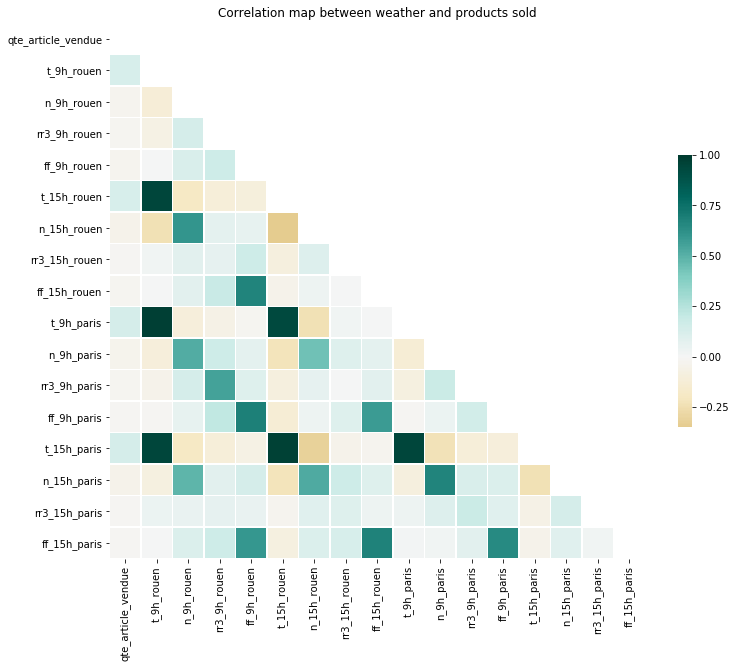

In [46]:
fig = plt.figure(figsize=(12,10))

#Mask for the uppertriangle
mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sn.heatmap(corrMatrix,cmap = 'BrBG', mask = mask, square= True, linewidths=0.5,cbar_kws={"shrink": 0.5}, center = 0)
plt.title("Correlation map between weather and products sold")
plt.show()


We can see that the temperature fields are very correlated one anothers. The nebulosity inside a same city is rather correlated too.

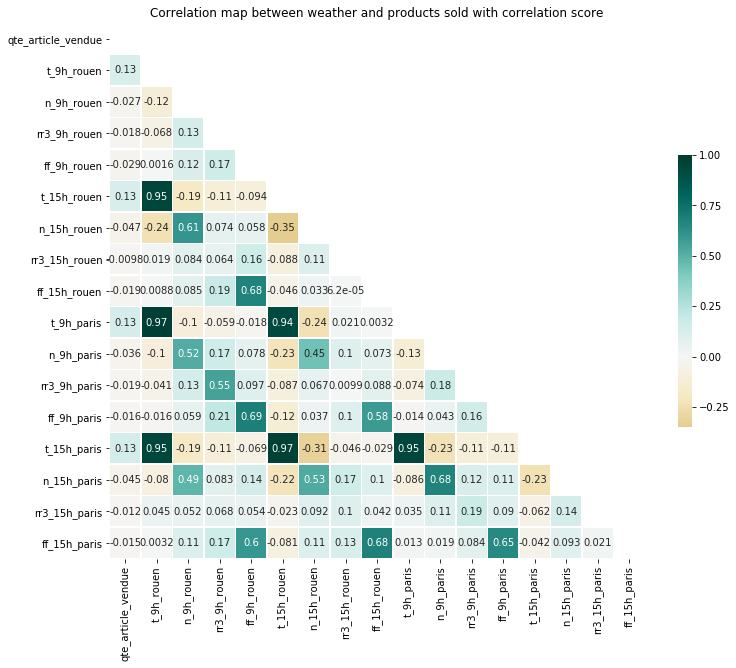

In [47]:
fig = plt.figure(figsize=(12,10))

#Mask for the uppertriangle
mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sn.heatmap(corrMatrix,cmap = 'BrBG', annot=True, mask = mask, square= True, linewidths=0.5,cbar_kws={"shrink": 0.5}, center = 0)
plt.title("Correlation map between weather and products sold with correlation score")
plt.show()


The variable to predict, called "qte_article_vendue", is correlated with the temperature but nothing else. Are there some products very correlated with the temperature or between each others ?

### Correlations of products sold with temperature

Recap of the different categories :

In [48]:
train.groupby('id_categorie_4')['cat4_nom'].unique()

id_categorie_4
1001639    [Boulan Vienn Patiss]
1001683            [Charcuterie]
1001684              [Crémerie ]
1001685      [Fruits et Légumes]
1001687               [Traiteur]
1001688              [Baguettes]
1001691              [Triangles]
1001692    [Autr Sandwich Indus]
Name: cat4_nom, dtype: object

How many products are there in each category ?

In [49]:
train.groupby('cat4_nom')['article_nom'].nunique()

cat4_nom
Autr Sandwich Indus     7
Baguettes              19
Boulan Vienn Patiss    19
Charcuterie            35
Crémerie               70
Fruits et Légumes      14
Traiteur               15
Triangles              25
Name: article_nom, dtype: int64

In [50]:
# Let's calculate the correlation between each category
corrList=train.groupby('cat4_nom')[['qte_article_vendue','t_9h_rouen']].corr()

In [51]:
corrList.loc[:,'qte_article_vendue'].loc[:,'t_9h_rouen']

cat4_nom
Autr Sandwich Indus    0.170486
Baguettes              0.124832
Boulan Vienn Patiss    0.011939
Charcuterie            0.112770
Crémerie               0.147061
Fruits et Légumes      0.129795
Traiteur               0.054006
Triangles              0.232213
Name: qte_article_vendue, dtype: float64

##### Let's have a better look at the crémerie category

#### Crémerie

In [52]:
train[train['cat4_nom']=='Crémerie ']['cat6_nom'].unique()

array(['Beurre Margarine', 'Desserts Crémerie', 'Fromages', 'Lait Frais',
       'Yaourts à Boire', 'Yaourt From Blanc'], dtype=object)

In [53]:
corrList=train[train['cat4_nom']=='Crémerie '].groupby('cat6_nom')[['qte_article_vendue','t_9h_rouen']].corr()

In [54]:
corrList.loc[:,'qte_article_vendue'].loc[:,'t_9h_rouen']

cat6_nom
Beurre Margarine     0.122574
Desserts Crémerie    0.220019
Fromages             0.044367
Lait Frais           0.223392
Yaourt From Blanc    0.153450
Yaourts à Boire      0.183369
Name: qte_article_vendue, dtype: float64

#### Desserts

In [55]:
train[train['cat6_nom']=='Desserts Crémerie']['article_nom'].unique()

array(['Pompotes Pomme Fraise 90G Materne',
       'Pompotes Pomme Nature 90G Materne',
       'Pompotes Pom S Sucre 90G Materne'], dtype=object)

In [56]:
corrList=train[train['cat6_nom']=='Desserts Crémerie'].groupby('article_nom')[['qte_article_vendue','t_9h_rouen']].corr()

In [57]:
corrList.loc[:,'qte_article_vendue'].loc[:,'t_9h_rouen']

article_nom
Pompotes Pom S Sucre 90G Materne     0.153947
Pompotes Pomme Fraise 90G Materne    0.346139
Pompotes Pomme Nature 90G Materne    0.160976
Name: qte_article_vendue, dtype: float64

#### Lait Frais

In [58]:
corrList=train[train['cat6_nom']=='Lait Frais'].groupby('article_nom')[['qte_article_vendue','t_9h_rouen']].corr()

In [59]:
corrList.loc[:,'qte_article_vendue'].loc[:,'t_9h_rouen']

article_nom
Candy Up Chocolat 1L Candia          0.257501
Candy Up Chocolat 50Cl               0.306764
Lait 12 Ecreme Nature 1L Casino      0.237194
Lait 12 Ecreme Nature 50Cl Casino    0.278760
Name: qte_article_vendue, dtype: float64

#### Yaourts à Boire

In [60]:
corrList=train[train['cat6_nom']=='Yaourts à Boire'].groupby('article_nom')[['qte_article_vendue','t_9h_rouen']].corr()

In [61]:
corrList.loc[:,'qte_article_vendue'].loc[:,'t_9h_rouen']

article_nom
Actimel 100G Danone                         0.060833
Boissons Lactees 350Ml Bounty               0.127374
Boissons Lactees 350Ml Mars                 0.229671
Boissons Lactees 350Ml Mms                  0.109243
Boissons Lactees 350Ml Snickers             0.209136
Cafe Royal Caramel 230Ml Mifroma            0.319065
Cafe Royal Extra Strong 230Ml Mifroma       0.326946
Danonino Fraise 100G                        0.159729
Discoveries Americano 22Cl Starbucks        0.489218
Discoveries Cap 22Cl Starbuck               0.323499
Discoveries Caramel 22Cl Starbucks          0.265183
Discoveries Seattle 22Cl Starbucks          0.247346
Doubleshot Exp 200Ml Starbucks              0.166236
Frappuccino Cof 25Cl Starbucks              0.287723
Petits Filous Fraise 80G Yoplait            0.322607
Shakissimo Latte Cappucino 190Ml Nescafe    0.027026
Shakissimo Latte Expresso 190Ml Nescafe     0.065186
Shakissimo Latte Macchiato 190Ml Nescafe    0.121361
Yab Chataigne 25Cl Daunature      

#### Yaourt From Blanc

In [62]:
corrList=train[train['cat6_nom']=='Yaourt From Blanc'].groupby('article_nom')[['qte_article_vendue','t_9h_rouen']].corr()

In [63]:
corrList.loc[:,'qte_article_vendue'].loc[:,'t_9h_rouen']

article_nom
Danio Fraise 150G Danone               0.196196
Danio Framboise 150G Danone            0.187447
Danio Myrtille 150G Danone             0.200031
Danio Passion 150G Danone              0.243702
Danio Vanille 150G Danone              0.259660
Mamie Nova Chocolat 150G               0.047287
Mamie Nova Vanille 150G                0.156382
Mousse Choco 80G Dm                    0.097031
Panier Quartier Fraise 150G Yoplait    0.254833
Panier Quartiers Peche 150G Yoplait    0.200622
Yaourt Caramel Et Sel 150G Dm          0.061970
Yaourt Vanille 0 150G Dm               0.059202
Name: qte_article_vendue, dtype: float64

### All products ranked accordingly to their correlation with temperature

In [64]:
corrList=train.groupby('article_nom')[['qte_article_vendue','t_9h_rouen']].corr()

In [65]:
corrList.loc[:,'qte_article_vendue'].loc[:,'t_9h_rouen'].sort_values(ascending=True)

article_nom
Cookie Choc Nois 70G Michel Augustin          -0.228065
Pain Chocolat 60G Cuit/Place Neuhauser        -0.209300
Croissant 60G Cuit/Place Neuhauser            -0.196827
Camembert Coeur De Lion 150G                  -0.187105
Navette Poulet Concombre 105G Dm              -0.167364
Cheese Burger 145G Charal                     -0.121262
Carrement Tarte Chevre Tomate 190G            -0.103735
Sdw Bag Camp Rosette Cornichon 220G Daunat    -0.064006
Croc Pomme Raisin 80G Dm                      -0.062031
Tartare 6P 96G Afs                            -0.046584
Pom Panache X2 280G Vdumay                    -0.045702
Flan Patissier 120G Daunat                    -0.045188
Mousse De Canard 2X50G Madrange               -0.032558
Rosette 10 Trs 100G Dm                        -0.030536
Cookie Cara Noix Pecan 70G Michel Augustin    -0.027269
Rillettes Poulet 110G                         -0.024344
Radiatori Carbo 400G Sodebo                   -0.021086
Monop Tranche Gouda 200G Dm         

##### Winter :
Mainly industrial biscuits and pastries.

##### Summer :
The Discoveries Americano and Capuccino are iced coffees. The Yop Tropical Fresh is a limited edition, focusing its ads on summer.

In addition, a lots of the sandwiches purchased in summer are fresh : with salmon for example, which is easier to eat in summer.

### Are there differences if we get rid off the summer holidays ?

In [76]:
#

corrMatrix=train

corrMatrix=corrMatrix.drop(train[train['date'].apply(lambda date : date.month)==7].index)
corrMatrix=corrMatrix.drop(train[train['date'].apply(lambda date : date.month)==8].index)

In [77]:
corrList=corrMatrix.groupby('article_nom')[['qte_article_vendue','t_9h_rouen']].corr()

In [78]:
corrList.loc[:,'qte_article_vendue'].loc[:,'t_9h_rouen'].sort_values(ascending=True)

article_nom
Cookie Choc Nois 70G Michel Augustin          -0.223662
Pain Chocolat 60G Cuit/Place Neuhauser        -0.171019
Croissant 60G Cuit/Place Neuhauser            -0.156441
Camembert Coeur De Lion 150G                  -0.145222
Navette Poulet Concombre 105G Dm              -0.111357
Carrement Tarte Chevre Tomate 190G            -0.105716
Cheese Burger 145G Charal                     -0.095911
Tartare 6P 96G Afs                            -0.079397
Sdw Bag Camp Rosette Cornichon 220G Daunat    -0.059796
Rosette 10 Trs 100G Dm                        -0.054192
Pom Panache X2 280G Vdumay                    -0.039907
Sdw Jambon Cheddar 230G Xxl                   -0.036670
Danonino Fraise 100G                          -0.031175
Cookie Cara Noix Pecan 70G Michel Augustin    -0.028548
Yop Framboise 250G Yoplait                    -0.025897
Shakissimo Latte Cappucino 190Ml Nescafe      -0.025158
Emmental Tranches Entremont 150G              -0.021703
Croc Pomme Raisin 80G Dm            

So the fish sandwiches and beverages are really correlated with the temperatures, it is not only caused by the summer holidays.

### Question by M Lecornu : are there more coffees sold in winter because of the cold weather ?

In [79]:
searchfor = ['Starbuck','Nescafe','Cafe']

train[train.article_nom.str.contains('|'.join(searchfor))]['article_nom'].unique()

array(['Discoveries Seattle 22Cl Starbucks',
       'Discoveries Cap 22Cl Starbuck',
       'Discoveries Caramel 22Cl Starbucks',
       'Cafe Royal Extra Strong 230Ml Mifroma',
       'Cafe Royal Caramel 230Ml Mifroma',
       'Discoveries Americano 22Cl Starbucks',
       'Doubleshot Exp 200Ml Starbucks', 'Frappuccino Cof 25Cl Starbucks',
       'Shakissimo Latte Macchiato 190Ml Nescafe',
       'Shakissimo Latte Cappucino 190Ml Nescafe',
       'Shakissimo Latte Expresso 190Ml Nescafe'], dtype=object)

In [80]:
searchfor = ['Starbuck','Nescafe','Cafe']

corrMatrixCafe=train[train.article_nom.str.contains('|'.join(searchfor))]

corrList=corrMatrixCafe.groupby('article_nom')[['qte_article_vendue','t_9h_rouen']].corr()

corrList.loc[:,'qte_article_vendue'].loc[:,'t_9h_rouen'].sort_values(ascending=True)

article_nom
Shakissimo Latte Cappucino 190Ml Nescafe    0.027026
Shakissimo Latte Expresso 190Ml Nescafe     0.065186
Shakissimo Latte Macchiato 190Ml Nescafe    0.121361
Doubleshot Exp 200Ml Starbucks              0.166236
Discoveries Seattle 22Cl Starbucks          0.247346
Discoveries Caramel 22Cl Starbucks          0.265183
Frappuccino Cof 25Cl Starbucks              0.287723
Cafe Royal Caramel 230Ml Mifroma            0.319065
Discoveries Cap 22Cl Starbuck               0.323499
Cafe Royal Extra Strong 230Ml Mifroma       0.326946
Discoveries Americano 22Cl Starbucks        0.489218
Name: qte_article_vendue, dtype: float64

## Correlation between products

In [81]:
train.head()

id   implant        date  \
0  39fc404102d5  NF059473  2016-01-01   
1  aa697ce32b43  NF059473  2016-01-01   
2  291a469e1b50  NF059473  2016-01-01   
3  2dbc07dbc8f0  NF059473  2016-01-01   
4  e664714361d6  NF059473  2016-01-01   

                                  article_nom  id_categorie_6  \
0  Cookie Cara Noix Pecan 70G Michel Augustin         1001672   
1         Cookie Choc Blc 70G Michel Augustin         1001672   
2        Cookie Choc Nois 70G Michel Augustin         1001672   
3            Cookie Choco 70G Michel Augustin         1001672   
4          Croissant 60G Cuit/Place Neuhauser         1001674   

   qte_article_vendue  id_categorie_5  id_categorie_4           cat6_nom  \
0                0.56         1001664         1001639  Patiss PréEmballé   
1                1.11         1001664         1001639  Patiss PréEmballé   
2                0.56         1001664         1001639  Patiss PréEmballé   
3                0.56         1001664         1001639  Patiss PréEmballé   
4                4.08         1001665         1001639   Vienn cuit/place   

       cat5_nom             cat4_nom  t_9h_rouen  n_9h_rouen  rr3_9h_rouen  \
0    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
1    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
2    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
3    Patisserie  Boulan Vienn Patiss      278.25       100.0           0.2   
4  Viennoiserie  Boulan Vienn Patiss      278.25       100.0           0.2   

   ff_9h_rouen  t_15h_rouen  n_15h_rouen  rr3_15h_rouen  ff_15h_rouen  \
0          4.0       280.05        100.0            0.0           7.6   
1          4.0       280.05        100.0            0.0           7.6   
2          4.0       280.05        100.0            0.0           7.6   
3          4.0       280.05        100.0            0.0           7.6   
4          4.0       280.05        100.0            0.0           7.6   

   t_9h_paris  n_9h_paris  rr3_9h_paris  ff_9h_paris  t_15h_paris  \
0      278.05       101.0           0.0          2.5       280.55   
1      278.05       101.0           0.0          2.5       280.55   
2      278.05       101.0           0.0          2.5       280.55   
3      278.05       101.0           0.0          2.5       280.55   
4      278.05       101.0           0.0          2.5       280.55   

   n_15h_paris  rr3_15h_paris  ff_15h_paris  aller_zone_1  aller_zone_2  \
0        100.0            0.0           3.2             0             0   
1        100.0            0.0           3.2             0             0   
2        100.0            0.0           3.2             0             0   
3        100.0            0.0           3.2             0             0   
4        100.0            0.0           3.2             0             0   

   aller_zone_3  aller_zone_4  aller_zone_5  aller_zone_6  retour_zone_1  \
0             0             0             0             0              0   
1             0             0             0             0              0   
2             0             0             0             0              0   
3             0             0             0             0              0   
4             0             0             0             0              0   

   retour_zone_2  retour_zone_3  retour_zone_4  retour_zone_5  retour_zone_6  
0              0              0              0              0              0  
1              0              0              0              0              0  
2              0              0              0              0              0  
3              0              0              0              0              0  
4              0              0              0              0              0

In [82]:
corrMatrixProduct=train.pivot(index=train.index.name, columns='article_nom', values='qte_article_vendue').fillna(0)

In [83]:
corrMatrixProduct['date']=train['date']

In [84]:
corrMatrixProduct=corrMatrixProduct.groupby('date').sum().corr()

In [85]:
corrMatrixProduct

article_nom                                  12 Baguette Viennoise X2 170G La Boulangere  \
article_nom                                                                                
12 Baguette Viennoise X2 170G La Boulangere                                     1.000000   
4 Tr Jb Italien 120G Dm                                                         0.251398   
4 Trs Filet Plt Roti 120G Dm                                                    0.375361   
4Tr Blanc De Poulet 160G Dm                                                     0.196723   
Actimel 100G Danone                                                             0.107139   
Ananas Mcx 200G Dm                                                              0.168040   
Assiette Francaise 80G Sapresti                                                 0.252094   
Baguette Jambon Crudites 255G Dm                                                0.374837   
Baguette Poulet Crudites 250G Dm                                                0.388921   
Baguette Thon Basilic 235G Dm                                                   0.049246   
Banane X2 200G Vdumay                                                           0.307191   
Baton Berger Mini Nature 80G Jb                                                 0.406150   
Baton Berger Mini Noix 80G Jb                                                   0.386199   
Baton Berger Mini Piment Doux 80G Jb                                            0.493995   
Baton Berger Mini Poulet 100G Jb                                                0.440383   
Baton Berger Nature 75G Jb                                                      0.201632   
Baton Berger Rondelles 120G Jb                                                  0.155505   
Batonnets Coraya Saveur 100G Aoc                                                0.380008   
Beurre Doux 125G President Dm                                                   0.169722   
Beurrier Tendre 125G President                                                  0.195942   
...                                                                                  ...   
Very Best 220G Charal                                                           0.306603   
Wrap Poulet Basilic 200G Dm                                                     0.325203   
Wrap Poulet Ceasar 205G Dm                                                      0.464949   
Yab Chataigne 25Cl Daunature                                                    0.437254   
Yab Vanille 25Cl Daunature                                                      0.533180   
Yaourt Caramel Et Sel 150G Dm                                                   0.052400   
Yaourt Framboise 25Cl Michel Augustin                                           0.195242   
Yaourt Mang Pas 25Cl Michel Augustin                                            0.196772   
Yaourt Myrtille 25Cl Michel Augustin                                            0.087764   
Yaourt Vanille 0 150G Dm                                                        0.095318   
Yaourt Vanille 25Cl Michel Augustin                                             0.223080   
Yop 850G Tropical Fresh 850G Yoplait                                            0.380464   
Yop Fraise 250G Yoplait                                                         0.345083   
Yop Fraise 500G Yoplait                                                         0.358066   
Yop Fraise 850G Yoplait                                                         0.359845   
Yop Framboise 250G Yoplait                                                      0.186702   
Yop Framboise 500G Yoplait                                                      0.307470   
Yop Framboise 850G Yoplait                                                      0.401767   
Yop Vanille 500G Yoplait                                                        0.342782   
Yop Vanille 850G Yoplait                                                        0.298055   

article_nom                                

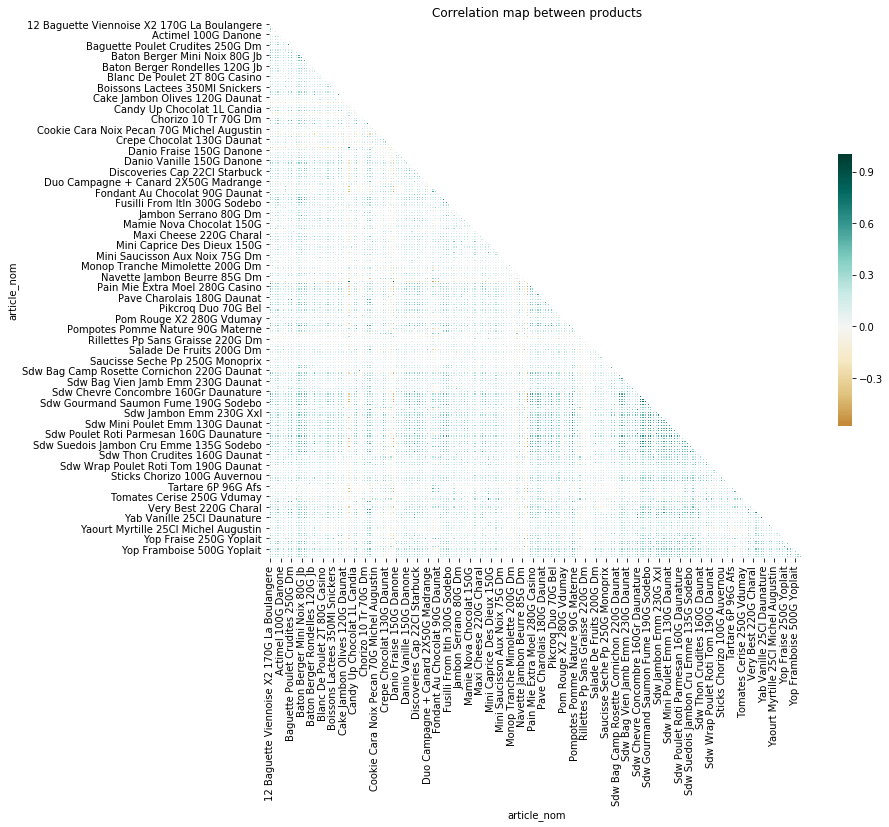

In [86]:
fig = plt.figure(figsize=(12,10))

#Mask for the uppertriangle
mask = np.zeros_like(corrMatrixProduct, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sn.heatmap(corrMatrixProduct,cmap = 'BrBG', mask = mask, square= True, linewidths=0.5,cbar_kws={"shrink": 0.5}, center = 0)
plt.title("Correlation map between products")
plt.show()